# Tourism Exploratory

In [119]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
from scipy.stats import skew, skewtest, kurtosis, kurtosistest
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
df = pd.read_pickle("../data/Tourism.pickle").set_index(['Country Code','Year'])

## Descriptive Statistics

| Variable          | Name                                                                             |
|-------------------|----------------------------------------------------------------------------------|
| ST.INT.ARVL       | International tourism, number of arrivals                                        |
| ST.INT.RCPT.CD    | International tourism, receipts (current US\$)                                   |
| ST.INT.TVLR.CD    | International tourism, receipts for passenger transport items (current US\$)     |
| ST.INT.TRNR.CD    | International tourism, receipts for travel items (current US\$)                  |
| ST.INT.DPRT       | International tourism, expenditures (current US\$)                               |
| ST.INT.XPND.CD    | International tourism, expenditures for passenger transport items (current US\$) |
| ST.INT.TVLX.CD    | International tourism, expenditures for travel items (current US\$)              |
| ST.INT.TRNX.CD    | International tourism, number of departures                                      |
| ST.INT.RCPT.XP.ZS | International tourism, receipts (\% of total exports)                            |
| ST.INT.XPND.MP.ZS | International tourism, expenditures (% of total imports)                         |

### Central Tendency
| {{ m = df.mean() }} {{ m.name = "Mean" }} {{ m.to_frame() }} | {{ md = df.median() }} {{ md.name = "Median" }} {{ md.to_frame() }} |  |
|--------------------------------------------------------------|---------------------------------------------------------------------|---|

### Variance and Ranges
{{ df.describe().transpose()[['std','min','max']].rename(index=str, columns={"std":"Standard Deviation","min":"Minimum Value","max":"Maximum Value"}) }}

### Skewness

In [59]:
# calculate skews of variables
skews = []
for var_name in df.columns:
    variable = df[var_name][(df[var_name].notna())].tolist()
    s = skew(variable)
    zscore, pvalue = skewtest(variable)
    skews.append({
        'variable': var_name,
        'skewness': s,
        'z-score': zscore,
        'p-value': pvalue,
        'normal': (pvalue >= .05)
    })
skew_df = pd.DataFrame(skews,columns=['variable','normal','skewness','z-score','p-value'])

H<sub>0</sub>: Variable sample has skew of the normal distribution (p ≥ .05)

H<sub>a</sub>: Variable does not have the skew of the normal distribution

{{ skew_df }}

### Kurtosis

In [65]:
# calculate kurtosis of variables
kurt = []
for var_name in df.columns:
    variable = df[var_name][(df[var_name].notna())].tolist()
    k = kurtosis(variable)
    zscore, pvalue = kurtosistest(variable)
    kurt.append({
        'variable': var_name,
        'kurtosis': k,
        'z-score': zscore,
        'p-value': pvalue,
        'normal': (pvalue >= .05)
    })
kurt_df = pd.DataFrame(kurt,columns=['variable','normal','kurtosis','z-score','p-value'])

H<sub>0</sub>: Variable sample has kurtosis of the normal distribution (p ≥ .05)

H<sub>a</sub>: Variable does not have the kurtosis of the normal distribution

{{ kurt_df }}

### Quartiles
{{ df.describe().transpose()[["min","25%","50%","75%","max"]] }}

## EDA Visualizations

### Histograms

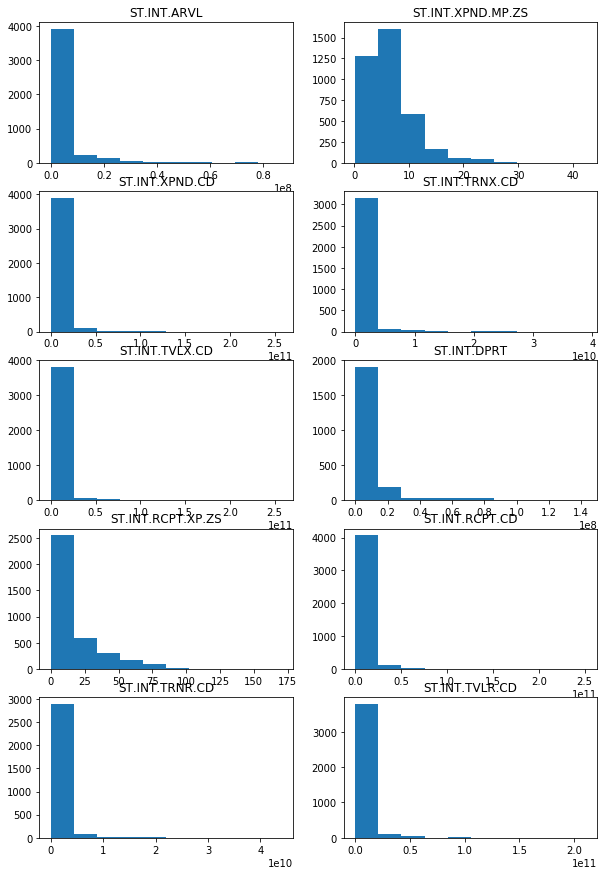

In [112]:
# plot histograms
%matplotlib inline
fig = plt.figure(figsize=(10,15))
for c,num in zip(df.columns, range(1,11)):
    ax = fig.add_subplot(5,2,num)
    ax.hist(df[c])
    ax.set_title(c)
plt.show()

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3904.,  241.,  135.,   51.,   30.,   25.,   27.,    6.,   17.,
          10.]),
 array([-0.42790632,  0.42231611,  1.27253854,  2.12276097,  2.97298339,
         3.82320582,  4.67342825,  5.52365068,  6.37387311,  7.22409554,
         8.07431797]),
 <a list of 10 Patch objects>)

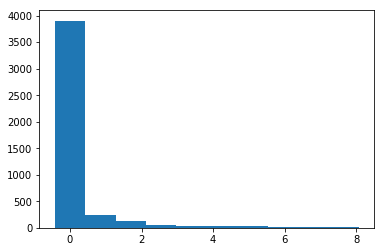